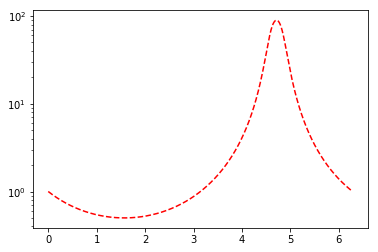

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def post_inc(phi, e=0, f=0, theta=90, vel_ratio=1):
    """
    Calculate the post impact inclination I'
    """
    e_factor = np.sqrt(1 - e**2) / (1 + e*np.cos(f))
    H = 1 + \
        2*e_factor*vel_ratio*np.sin(theta)*np.sin(phi-f) + \
        e_factor**2*vel_ratio**2*(np.cos(theta)**2 + np.sin(theta)**2*np.sin(phi-f)**2)
    cos_post_I = (1/np.sqrt(H))*(1 + e_factor*vel_ratio*np.sin(theta)*np.sin(phi-f))
    post_I = np.arccos(cos_post_I)
    return post_I * 180. / np.pi

vel_ratio = 1
theta = (89) * np.pi / 180.

phi = np.linspace(0, 2*np.pi, 10000)

plt.plot(phi, post_inc(phi, theta=theta, vel_ratio=vel_ratio), 'r--')
plt.yscale('log')